In [1]:
#Importera library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importera dataset
dataset = pd.read_csv("game_sales.csv")
dataset

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#Ta bort alla kolumn med 'NaN värden'
dataset = dataset.dropna(axis=0, how='any')

In [3]:
#Ta bort orelevanta data
dataset = dataset.drop(['Platform','Genre','Publisher','Name','Year_of_Release','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Count','User_Score','User_Count','Developer','Rating'],axis=1)
dataset

,Global_Sales,Critic_Score
0,82.53,76.0
2,35.52,82.0
3,32.77,80.0
6,29.80,89.0
7,28.92,58.0
...,...,...
16667,0.01,46.0
16677,0.01,81.0
16696,0.01,80.0
16700,0.01,61.0


In [4]:
X = dataset.iloc[:,:].values
y = dataset.iloc[:,:].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
X_test

array([[ 1.09, 74.  ],
       [ 0.33, 77.  ],
       [ 0.24, 76.  ],
       ...,
       [ 0.12, 60.  ],
       [ 0.23, 68.  ],
       [ 0.66, 71.  ]])

In [7]:
y_test

array([[ 1.09, 74.  ],
       [ 0.33, 77.  ],
       [ 0.24, 76.  ],
       ...,
       [ 0.12, 60.  ],
       [ 0.23, 68.  ],
       [ 0.66, 71.  ]])

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
regressor = LinearRegression()

In [10]:
#Training the model uses the object method .fit
regressor.fit(X_train, y_train)#Tränar modellen

LinearRegression()

In [11]:
#Predict test result
y_pred = regressor.predict(X_test)
print(y_pred)

[[ 1.09 74.  ]
 [ 0.33 77.  ]
 [ 0.24 76.  ]
 ...
 [ 0.12 60.  ]
 [ 0.23 68.  ]
 [ 0.66 71.  ]]


In [12]:
print(y_test)

[[ 1.09 74.  ]
 [ 0.33 77.  ]
 [ 0.24 76.  ]
 ...
 [ 0.12 60.  ]
 [ 0.23 68.  ]
 [ 0.66 71.  ]]


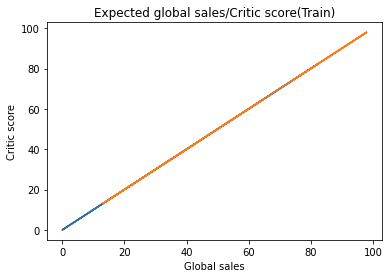

In [13]:
plt.plot(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train))
plt.title("Expected global sales/Critic score(Train)")
plt.xlabel("Global sales")
plt.ylabel("Critic score")
plt.show()

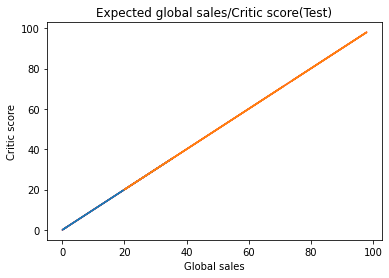

In [14]:
plt.plot(X_test, y_test, color='red')
plt.plot(X_test, regressor.predict(X_test))
plt.title("Expected global sales/Critic score(Test)")
plt.xlabel("Global sales")
plt.ylabel("Critic score")
plt.show()